<a href="https://colab.research.google.com/github/sandeshchand/mnistusingautoencoder/blob/main/Mnistusingautoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 7: AssignmentLoad the‘MNIST’dataset and perform the following tasks:•Create an autoencoder with convolutional layers•Compare the accuracy of the model with the previous model(without the convolutional layers, that me built in module 7 class).The dataset description is same as the previous modules.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Input,Flatten,\
                                    Reshape,LeakyReLU as LR,\
                                    Activation,Dropout
from tensorflow.keras.models import Model,Sequential
from IPython import display




In [ ]:
#Load MNist data
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train/255.0
X_test=X_test/255.0


11493376/11490434 [==============================] - 0s 0us/step


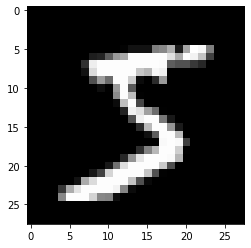

In [ ]:
#Plot image data from X_train
plt.imshow(X_train[0],cmap="gray")
plt.show()

#Deciding latent size
Latent size is the size of the latent space: the vector holding the information after compression. This value is a crucial hyperparameter. If this value is too small, there won’t be enough data for reconstruction and if the value is too large, overfitting can occur.

In [ ]:
LATENT_SIZE = 32

Creating Encoder

In [ ]:
encoder=Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(512),
                    LR(),
                    Dropout(0.5),
                    Dense(256),
                    LR(),
                    Dropout(0.5),
                    Dense(128),
                    LR(),
                    Dropout(0.5),
                    Dense(64),
                    LR(),
                    Dropout(0.5),
                    Dense(LATENT_SIZE),
                    LR()
])

Creatinng Decoder

In [ ]:
decoder=Sequential([
                    Dense(64,input_shape=(LATENT_SIZE,)),
                    LR(),
                    Dropout(0.5),
                    Dense(128),
                    LR(),
                    Dropout(0.5),
                    Dense(256),
                    LR(),
                    Dropout(0.5),
                    Dense(512),
                    LR(),
                    Dropout(0.5),
                    Dense(784),
                    Activation("sigmoid"),
                    Reshape((28,28))
                    
])

Creating model
reate a placeholder tensor which we can feed into each network to get the output of the whole model.*italicized text*

In [ ]:
image=Input(shape=(28,28))
latent_vector=encoder(image)
output=decoder(latent_vector)

model=Model(inputs=image, outputs=output)
model.compile("nadam",loss="binary_crossentropy")

Training the model

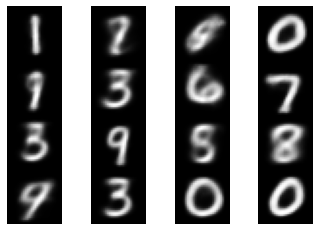

-------------- EPOCH 59 -------
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1919


In [ ]:
EPOCH= 60
for epoch in range(EPOCH):
  fig,axes=plt.subplots(4,4)
  rand=X_test[np.random.randint(0,10000,16)].reshape(4,4,1,28,28)
  display.clear_output()
  for i in range(4):
    for j in range(4):
      axes[i,j].imshow(model.predict(rand[i,j])[0],cmap="gray")
      axes[i,j].axis("off")

  plt.subplots_adjust(wspace=0 ,hspace=0)
  plt.show()
  print("--------------","EPOCH",epoch,"-------")
  model.fit(X_train,X_train)